<a href="https://colab.research.google.com/github/xxchanjotxx/Review_Sentiment_Analyzer/blob/main/Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
Using
- VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of Words
- Roberta model (pre-trained)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

## EDA


In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6263 non-null   int64 
 1   ProductId               6263 non-null   object
 2   UserId                  6263 non-null   object
 3   ProfileName             6263 non-null   object
 4   HelpfulnessNumerator    6263 non-null   int64 
 5   HelpfulnessDenominator  6263 non-null   int64 
 6   Score                   6263 non-null   int64 
 7   Time                    6263 non-null   int64 
 8   Summary                 6263 non-null   object
 9   Text                    6262 non-null   object
dtypes: int64(5), object(5)
memory usage: 489.4+ KB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,6263.0000,6263.000000,6263.000000,6263.000000,6.263000e+03
mean,3132.0000,1.591410,2.065624,4.178030,1.295220e+09
std,1808.1167,5.411248,6.075171,1.317674,4.770384e+07
min,1.0000,0.000000,0.000000,1.000000,9.617184e+08
25%,1566.5000,0.000000,0.000000,4.000000,1.271549e+09
50%,3132.0000,0.000000,1.000000,5.000000,1.309651e+09
75%,4697.5000,2.000000,2.000000,5.000000,1.330560e+09
max,6263.0000,187.000000,216.000000,5.000000,1.351210e+09


In [ ]:
# df = df.head(1000)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0, 0.5, 'Count')

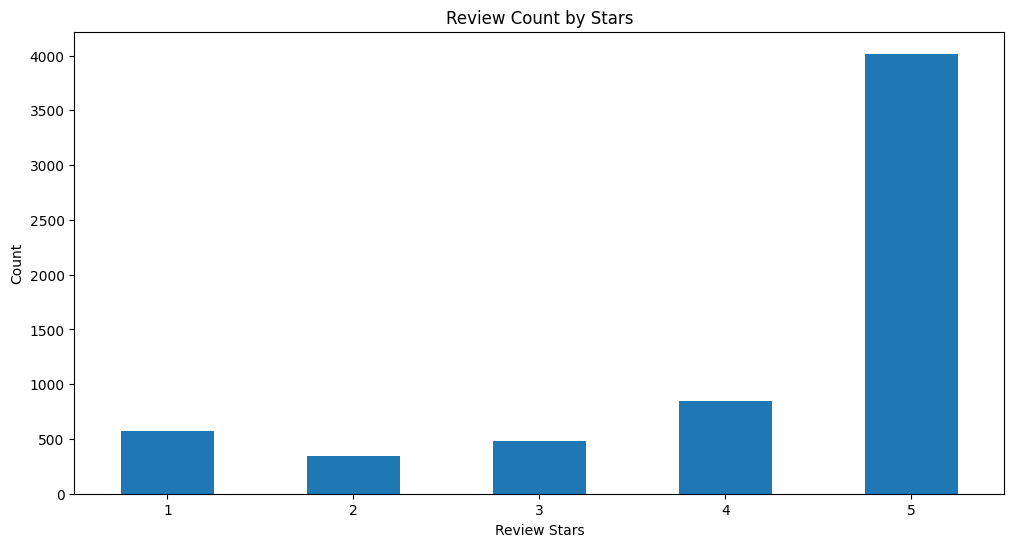

In [9]:
# df['Score'].value_counts().sort_index().plot(figsize = (12,6), kind = 'bar', title = "Review Count by Stars")
fig, ax = plt.subplots(figsize = (12,6))
df['Score'].value_counts().sort_index().plot(kind = 'bar', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title("Review Count by Stars")
ax.set_xlabel("Review Stars")
ax.set_ylabel("Count")


## NLTK

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [13]:
phrase = df["Text"][50]
phrase

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [14]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(phrase)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

## VADER

Uses bag of words approach. Stop words will be removed and each word will be scored and combined. Does not account for relationship of words which can be handled by Word Vectors.



In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
sia = SentimentIntensityAnalyzer()

In [ ]:
# sia.polarity_scores("hi this is a good positive score sentence")

In [ ]:
# sia.polarity_scores("i hate this")

In [19]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [21]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Text'])
    id = row['Id']
    res[id] = sia.polarity_scores(text)

  0%|          | 0/6263 [00:00<?, ?it/s]

In [22]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [23]:
for id, score in res.items():
  score['vader_neg'] = score.pop('neg',None)
  score['vader_neu'] = score.pop('neu',None)
  score['vader_pos'] = score.pop('pos',None)
  score['vader_compound'] = score.pop('compound',None)

In [24]:
res

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_compound': 0.883},
 7: {'vader_neg': 0.034,
  'vader_neu': 0.693,
  'vader_pos': 0.273,
  'vader_compound': 0.9346},
 8: {'vader_neg': 0.0,
  'vader_neu': 0.52,
  'vader_pos': 0.48,
  'vader_compound': 0.9487},
 9: {'vader_neg': 0.0,
  'vader_neu': 0.851,
  'vader_pos': 0.149,
  'vader_compound': 0.6369},
 10: {'vader_neg': 0.0,
  'vader_neu': 0.705,
  'vader_pos': 0.295,
  'vader_compound': 0.8313},
 11: {'vader_neg': 0.017,
  'vader_neu': 0

In [26]:
vaders = pd.DataFrame(res).T
vaders

,vader_neg,vader_neu,vader_pos,vader_compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
6259,0.000,0.716,0.284,0.9163
6260,0.000,0.837,0.163,0.9780
6261,0.018,0.722,0.260,0.9836
6262,0.059,0.623,0.319,0.9547


In [27]:
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders

,Id,vader_neg,vader_neu,vader_pos,vader_compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
6258,6259,0.000,0.716,0.284,0.9163
6259,6260,0.000,0.837,0.163,0.9780
6260,6261,0.018,0.722,0.260,0.9836
6261,6262,0.059,0.623,0.319,0.9547


In [28]:
vaders = vaders.merge(df, how = 'left')
vaders

,Id,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258,6259,0.000,0.716,0.284,0.9163,B000E65OF6,A3T1O6VEKRUM0X,Steve B. Meinel,0,0,5,1238112000,Flawless herbal tea,Sleepytime tea is one of those teas that can a...
6259,6260,0.000,0.837,0.163,0.9780,B000E65OF6,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0,0,5,1211932800,Perfect for the Evening,Valerian and Chamomile are blended with spearm...
6260,6261,0.018,0.722,0.260,0.9836,B000E65OF6,A1L52S6MPK3117,Kitty Yap,0,0,5,1190678400,"Wow, Im Addicted...But It's Great",What a wonderful product!<br />I can drink it ...
6261,6262,0.059,0.623,0.319,0.9547,B000KOSDY6,A3P0HSECT04NZ1,cartr229,3,3,5,1256342400,awesome corn cake,This product is so great. My daughter who is ...


In [29]:
vaders.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting the Score by Ratings

Text(0, 0.5, 'Vader compound Score')

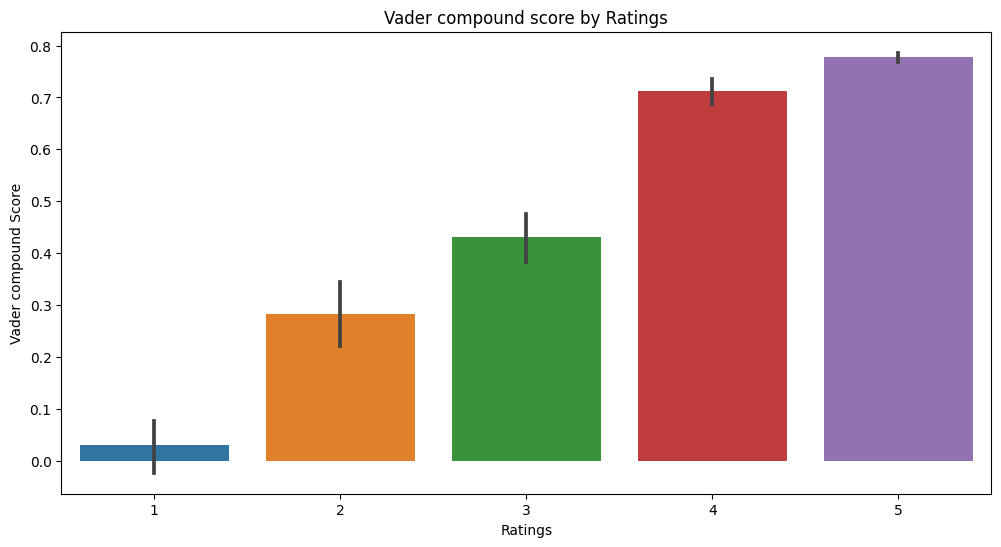

In [31]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(data = vaders, x = 'Score', y = 'vader_compound')
ax.set_title("Vader compound score by Ratings")
ax.set_xlabel('Ratings')
ax.set_ylabel('Vader compound Score')

<ipython-input-32-4358c0050225>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = vaders, x = 'Score', y = 'vader_pos', ax = ax[0], ci = None)
<ipython-input-32-4358c0050225>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = vaders, x = 'Score', y = 'vader_neu', ax = ax[1], ci = None)
<ipython-input-32-4358c0050225>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = vaders, x = 'Score', y = 'vader_neg', ax = ax[2], ci = None)


Text(0.5, 0.98, 'Sentiment Scores VS Ratings')

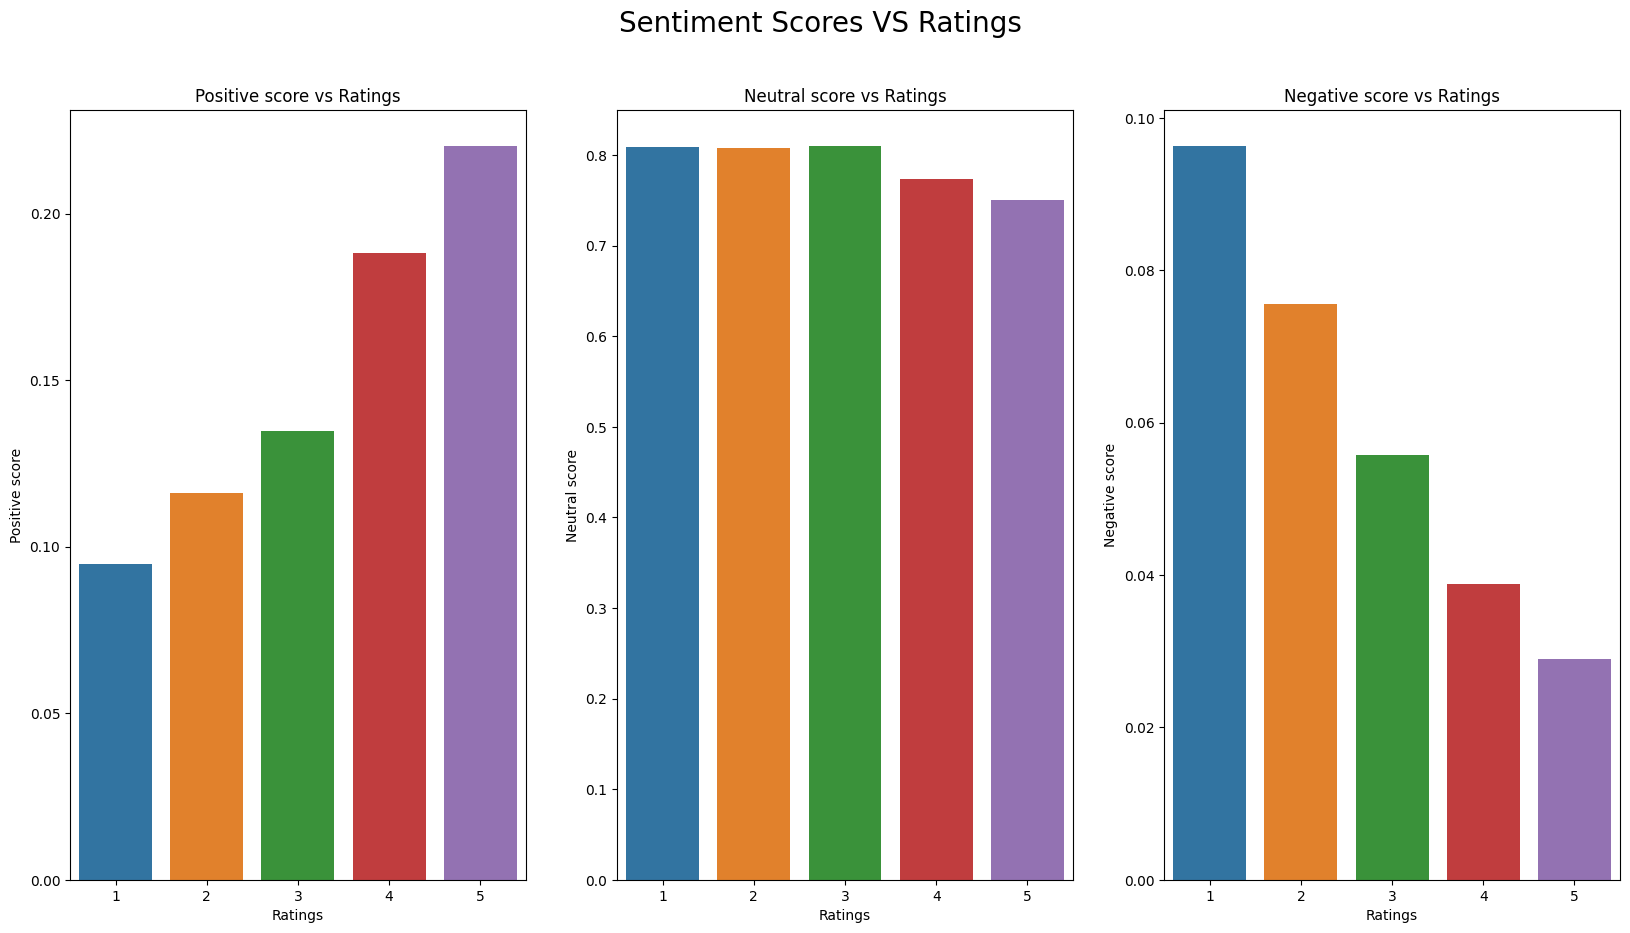

In [32]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.barplot(data = vaders, x = 'Score', y = 'vader_pos', ax = ax[0], ci = None)
sns.barplot(data = vaders, x = 'Score', y = 'vader_neu', ax = ax[1], ci = None)
sns.barplot(data = vaders, x = 'Score', y = 'vader_neg', ax = ax[2], ci = None)

ax[0].set_title("Positive score vs Ratings")
ax[1].set_title("Neutral score vs Ratings")
ax[2].set_title("Negative score vs Ratings")

ax[0].set_ylabel("Positive score")
ax[1].set_ylabel("Neutral score")
ax[2].set_ylabel("Negative score")

for i in range(3):
  ax[i].set_xlabel("Ratings")

# ax.set_xlabel('Ratings')
fig.suptitle("Sentiment Scores VS Ratings", fontsize = 20)

## Roberta Model

considers context of words, pre trained.

In [33]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax

In [34]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# tokenizer.model_max_length = 514


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [35]:
# With Vader, scores are:

sia.polarity_scores(phrase)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [38]:
# Checking the roberta Model
test_encoded_input = tokenizer("The fries are too cheesy for my liking", return_tensors='pt')
test_output = model(**test_encoded_input)
test_scores = output[0][0].detach().numpy()
test_scores = softmax(test_scores)
test_dict = {
      'negative': test_scores[0],
      'neutral': test_scores[1],
      'positive': test_scores[2]
  }
max_label = max(test_dict, key=lambda k: test_dict[k])
print(f"The predicted sentiment is: {max_label}")

The predicted sentiment is: negative


In [39]:
def roberta_model(text):
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  score_dict = {
      'roberta_neg': scores[0],
      'roberta_neu': scores[1],
      'roberta_pos': scores[2]
  }
  return score_dict

In [45]:
roberta_dict = {}
for i in tqdm(range(len(df)), total = len(df)):
  try:
    id = df['Id'][i]
    text = str(df['Text'][i])
    roberta_dict[id] = roberta_model(text)
  except RuntimeError or ValueError:
    print(f'Broke for: {id}')

  0%|          | 0/6263 [00:00<?, ?it/s]

Broke for: 83
Broke for: 187
Broke for: 529
Broke for: 540
Broke for: 746
Broke for: 863
Broke for: 1053
Broke for: 1070
Broke for: 1156
Broke for: 1321
Broke for: 1375
Broke for: 1498
Broke for: 1575
Broke for: 1796
Broke for: 1826
Broke for: 2169
Broke for: 2248
Broke for: 2476
Broke for: 2492
Broke for: 2584
Broke for: 2610
Broke for: 2897
Broke for: 2898
Broke for: 2902
Broke for: 2928
Broke for: 2942
Broke for: 2944
Broke for: 2947
Broke for: 2948
Broke for: 3022
Broke for: 3023
Broke for: 3025
Broke for: 3306
Broke for: 3788
Broke for: 3969
Broke for: 4107
Broke for: 4110
Broke for: 4307
Broke for: 4316
Broke for: 4408
Broke for: 4483
Broke for: 4512
Broke for: 4553
Broke for: 4583
Broke for: 5040
Broke for: 5182
Broke for: 5192
Broke for: 5365
Broke for: 5442
Broke for: 5709
Broke for: 5998
Broke for: 6003
Broke for: 6007
Broke for: 6106
Broke for: 6234


In [46]:
roberta_df = pd.DataFrame(roberta_dict).T
roberta_df.head()

,roberta_neg,roberta_neu,roberta_pos
1,0.009624,0.049980,0.940395
2,0.508986,0.452414,0.038600
3,0.003229,0.098067,0.898704
4,0.002295,0.090219,0.907486
5,0.001635,0.010302,0.988063


In [47]:
roberta_df = roberta_df.reset_index().rename(columns = {'index': 'Id'})

In [48]:
df = roberta_df.merge(vaders, how = 'right')

In [49]:
df[df['Id'] == 83]

,Id,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
82,83,NaN,NaN,NaN,0.04,0.794,0.165,0.9957,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 0 to 6262
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      6263 non-null   int64  
 1   roberta_neg             6208 non-null   float32
 2   roberta_neu             6208 non-null   float32
 3   roberta_pos             6208 non-null   float32
 4   vader_neg               6263 non-null   float64
 5   vader_neu               6263 non-null   float64
 6   vader_pos               6263 non-null   float64
 7   vader_compound          6263 non-null   float64
 8   ProductId               6263 non-null   object 
 9   UserId                  6263 non-null   object 
 10  ProfileName             6263 non-null   object 
 11  HelpfulnessNumerator    6263 non-null   int64  
 12  HelpfulnessDenominator  6263 non-null   int64  
 13  Score                   6263 non-null   int64  
 14  Time                    6263 non-null   

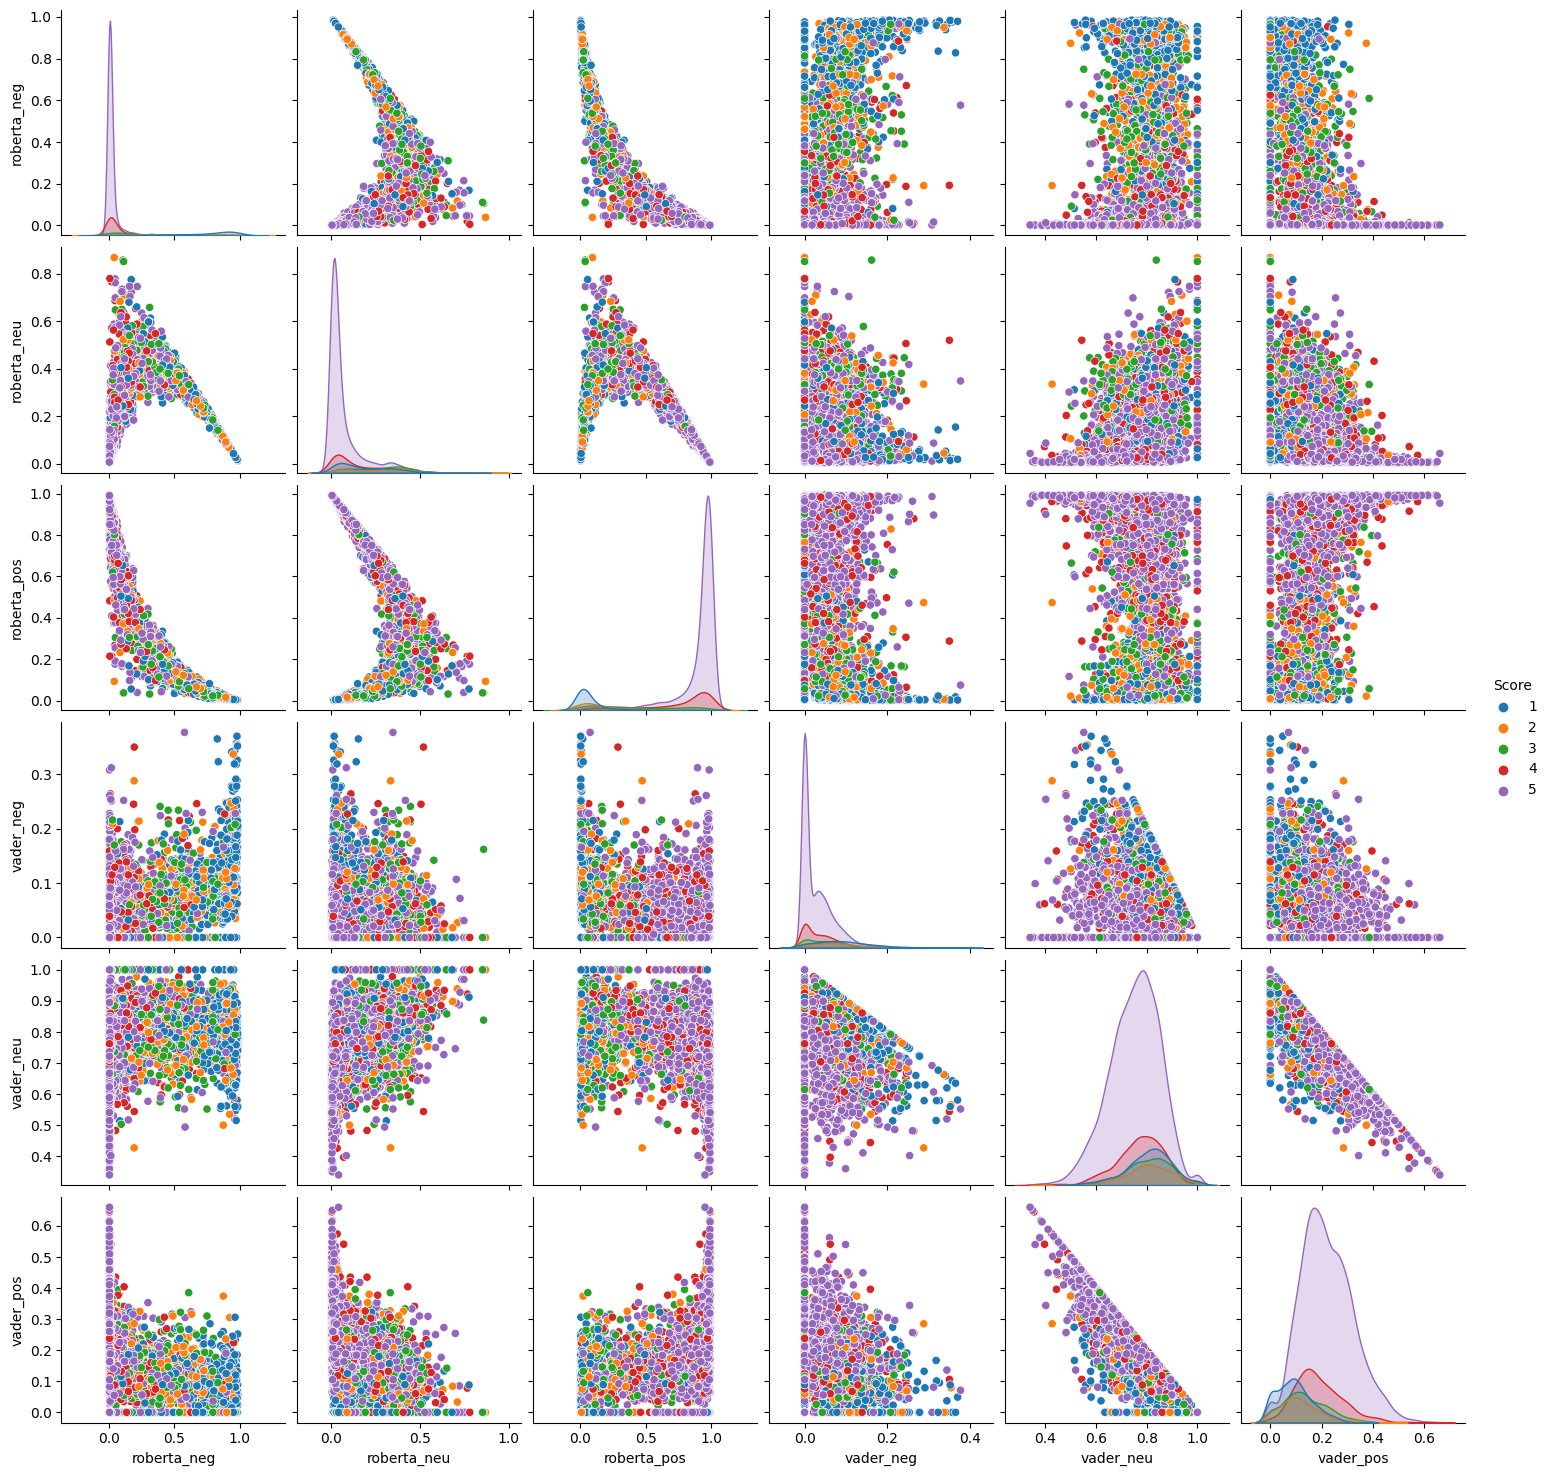

In [51]:
sns.pairplot(data = df, vars = ['roberta_neg', 'roberta_neu', 'roberta_pos', 'vader_neg', 'vader_neu', 'vader_pos'], hue = 'Score', palette= 'tab10')

## Exceptions:


1 star reviews with positive sentiment:


In [52]:
# Vader Score
df[df['Score']==1].sort_values(by = 'vader_pos', ascending = False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [53]:
# Roberta Score
df[df['Score']==1].sort_values(by = 'roberta_pos', ascending = False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

5 star reviews with negative sentiment


In [54]:
# vader
df[df['Score']==5].sort_values(by = 'vader_neg', ascending = False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [55]:
# roberta
df[df['Score']==5].sort_values(by = 'roberta_neg', ascending = False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

## Further Analysis


Questions to be answered:
- Best Product
- Worst Product
- Most Reviewed Product
- Customer with most reviews
- Customer with most positive reviews
- Customer with most negative reviews


In [56]:
df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [57]:
df.shape

(6263, 17)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 0 to 6262
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      6263 non-null   int64  
 1   roberta_neg             6208 non-null   float32
 2   roberta_neu             6208 non-null   float32
 3   roberta_pos             6208 non-null   float32
 4   vader_neg               6263 non-null   float64
 5   vader_neu               6263 non-null   float64
 6   vader_pos               6263 non-null   float64
 7   vader_compound          6263 non-null   float64
 8   ProductId               6263 non-null   object 
 9   UserId                  6263 non-null   object 
 10  ProfileName             6263 non-null   object 
 11  HelpfulnessNumerator    6263 non-null   int64  
 12  HelpfulnessDenominator  6263 non-null   int64  
 13  Score                   6263 non-null   int64  
 14  Time                    6263 non-null   

In [206]:
# Best Product: group by product ID's and have their average score and rating. Sort by rating first and then the roberta positive score. Also see how many times a product was reviewed

products_df = df.groupby('ProductId').agg({'roberta_pos': 'mean', 'roberta_neg': 'mean','Score': 'mean'})

In [207]:
products_df.sort_values(by = ['Score', 'roberta_pos'], ascending = [False, False])

,roberta_pos,roberta_neg,Score
ProductId,,,
B00579IZMY,0.992613,0.001545,5.0
B006JW4TQE,0.992320,0.001161,5.0
B007F96QQQ,0.992148,0.002214,5.0
B004SCD4NG,0.991761,0.001444,5.0
B000GJQ8J2,0.991740,0.001195,5.0
...,...,...,...
B000OJEUC6,0.002869,0.979679,1.0
B0048IK8UC,0.002844,0.973545,1.0
B0043JF3II,0.002807,0.978060,1.0


In [208]:
products_df['Count'] = df.groupby('ProductId')['Score'].count()
products_df

,roberta_pos,roberta_neg,Score,Count
ProductId,,,,
B00002NCJC,0.498530,0.423865,4.5,2
B00002Z754,0.983011,0.002626,5.0,2
B000084DVR,0.985728,0.001856,5.0,2
B000084E1U,0.159996,0.518121,5.0,1
B0000CERHH,0.871105,0.063402,5.0,3
...,...,...,...,...
B0093NIWVO,0.938356,0.005628,5.0,1
B0096E5196,0.968007,0.005786,5.0,2
B009HINRX8,0.853986,0.026630,4.5,6


In [209]:
products_df['Weighted Score'] = (0.5 * products_df['Score'] + 0.3 * products_df['Count'] + 0.2 * products_df['roberta_pos'])

In [210]:
products_df

,roberta_pos,roberta_neg,Score,Count,Weighted Score
ProductId,,,,,
B00002NCJC,0.498530,0.423865,4.5,2,2.949706
B00002Z754,0.983011,0.002626,5.0,2,3.296602
B000084DVR,0.985728,0.001856,5.0,2,3.297146
B000084E1U,0.159996,0.518121,5.0,1,2.831999
B0000CERHH,0.871105,0.063402,5.0,3,3.574221
...,...,...,...,...,...
B0093NIWVO,0.938356,0.005628,5.0,1,2.987671
B0096E5196,0.968007,0.005786,5.0,2,3.293601
B009HINRX8,0.853986,0.026630,4.5,6,4.220797


In [211]:
products_df = products_df.reset_index()
best_products_df = products_df.sort_values(by = 'Weighted Score', ascending = False).head(10)

In [212]:
products_df.sort_values(by = 'Weighted Score', ascending = False).tail(10)

,ProductId,roberta_pos,roberta_neg,Score,Count,Weighted Score
631,B003JNWQPC,0.003423,0.952412,1.0,1,0.800685
29,B0002567IW,0.003015,0.968830,1.0,1,0.800603
234,B000OJEUC6,0.002869,0.979679,1.0,1,0.800574
738,B0048IK8UC,0.002844,0.973545,1.0,1,0.800569
707,B0043JF3II,0.002807,0.978060,1.0,1,0.800561
883,B0060OP9TM,0.002724,0.972447,1.0,1,0.800545
613,B003AO5QZW,0.002465,0.972084,1.0,1,0.800493
230,B000NY8ODS,NaN,NaN,5.0,1,NaN
299,B0012OTH8O,NaN,NaN,5.0,1,NaN
682,B003ZFRKGO,NaN,NaN,5.0,1,NaN


In [213]:
best_products_df

,ProductId,roberta_pos,roberta_neg,Score,Count,Weighted Score
858,B005K4Q1VI,0.717981,0.170122,3.959877,324,99.323534
462,B001RVFDOO,0.836233,0.080244,4.419672,305,93.877083
705,B004391DK0,0.780244,0.106719,4.306034,232,71.909066
156,B000G6RYNE,0.669538,0.202160,4.013825,217,67.240820
303,B00139TT72,0.709379,0.142085,4.327044,159,50.005398
579,B002TMV3E4,0.693178,0.130360,4.083333,96,30.980302
354,B001E5E29A,0.764405,0.102646,4.318182,88,28.711972
390,B001EW5YQS,0.599619,0.223489,3.574713,87,28.007280
313,B0016FY6H6,0.662542,0.191419,3.776316,76,24.820666
658,B003TIVBSU,0.824997,0.091097,4.623188,69,23.176594


(0.0, 5.0)

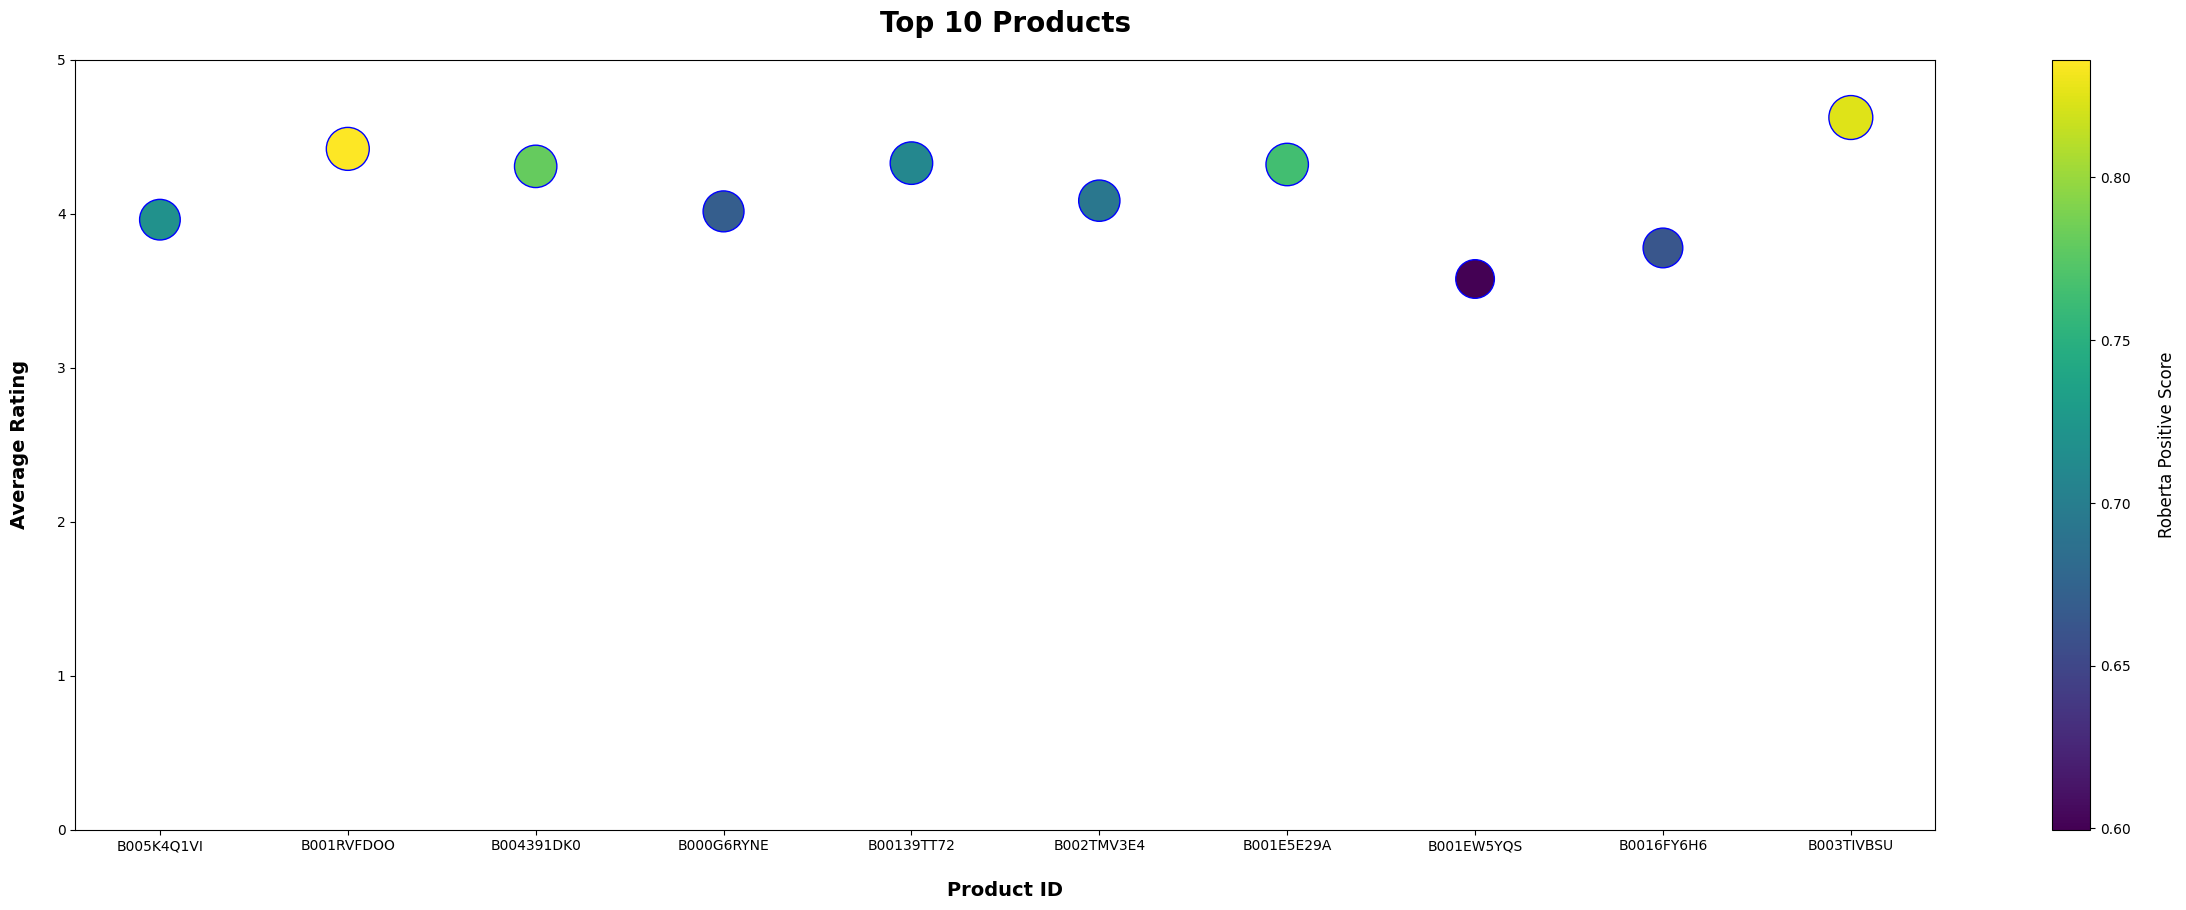

In [214]:
fig, ax = plt.subplots(figsize = (30,10))

bubble_size = best_products_df['Score'] / best_products_df['Score'].max() * 1000
bubble_color = best_products_df['roberta_pos']

scatter = ax.scatter(x = best_products_df['ProductId'], y = best_products_df['Score'], c = bubble_color, s = bubble_size, cmap='viridis', edgecolors='b')

ax.set_xlabel('Product ID', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_ylabel('Average Rating', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_title('Top 10 Products', fontsize = 20, pad = 20, fontweight = 'heavy')

# # Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Roberta Positive Score', fontsize = 12, labelpad = 20)
ax.set_ylim(0,5)

In [215]:
fig.savefig('top_10_products.png')

In [216]:
worst_products_df = products_df.sort_values(by = 'Weighted Score', ascending = True).head(10)

In [217]:
worst_products_df

,ProductId,roberta_pos,roberta_neg,Score,Count,Weighted Score
613,B003AO5QZW,0.002465,0.972084,1.0,1,0.800493
883,B0060OP9TM,0.002724,0.972447,1.0,1,0.800545
707,B0043JF3II,0.002807,0.978060,1.0,1,0.800561
738,B0048IK8UC,0.002844,0.973545,1.0,1,0.800569
234,B000OJEUC6,0.002869,0.979679,1.0,1,0.800574
29,B0002567IW,0.003015,0.968830,1.0,1,0.800603
631,B003JNWQPC,0.003423,0.952412,1.0,1,0.800685
251,B000SEJ842,0.004390,0.962567,1.0,1,0.800878
937,B007B9J6G2,0.004878,0.948219,1.0,1,0.800976
242,B000QSONJA,0.005104,0.953450,1.0,1,0.801021


In [218]:
df[df['ProductId']=='B003AO5QZW']['Text'].tolist()

['Received 6 bottles of concentrate from Paragon. Mixed EXACTLY to their specs., and was extremely disappointed in four of the six flavors.<br /><br />I am truly saddened to have to encourage you to NOT purchase the Watermelon flavor.<br /><br />This item has be returned for a refund.']

(0.0, 5.0)

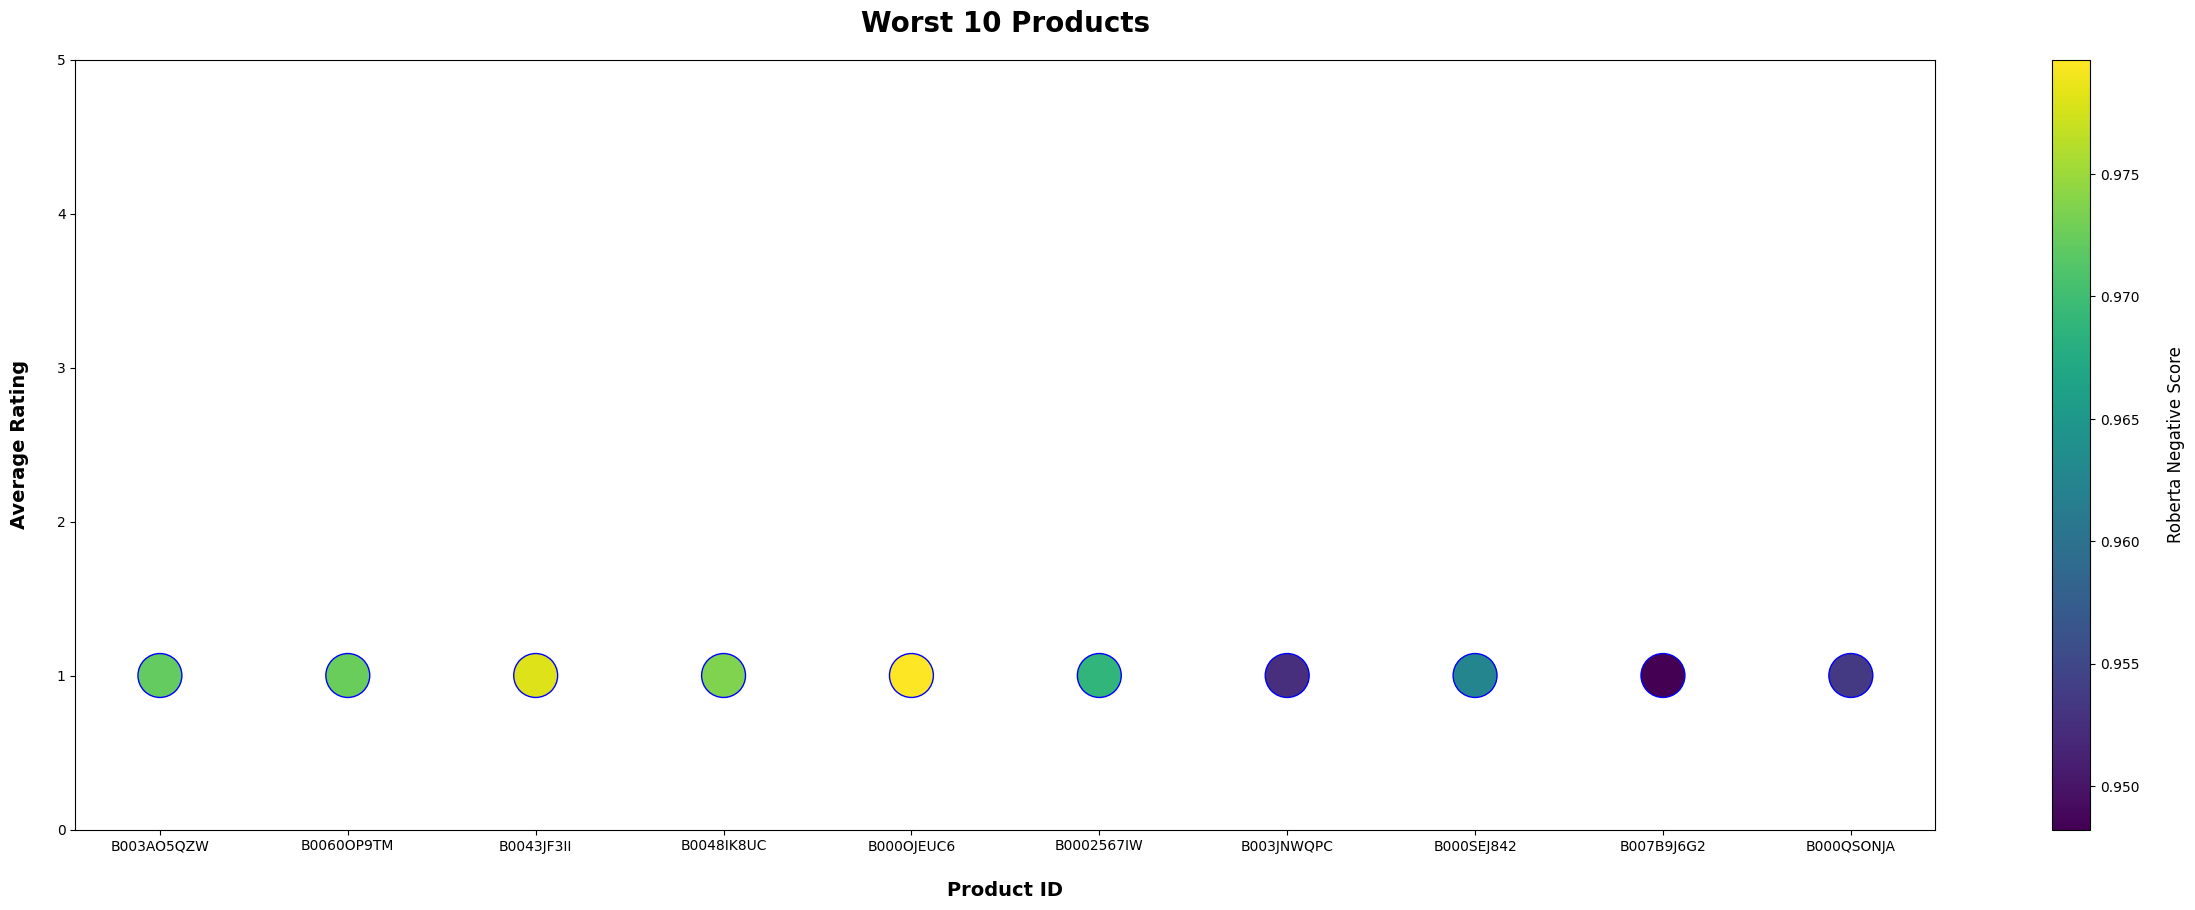

In [219]:
fig, ax = plt.subplots(figsize = (30,10))

bubble_size = worst_products_df['Score'] / worst_products_df['Score'].max() * 1000
bubble_color = worst_products_df['roberta_neg']

scatter = ax.scatter(x = worst_products_df['ProductId'], y = worst_products_df['Score'], c = bubble_color, s = bubble_size, cmap='viridis', edgecolors='b')

ax.set_xlabel('Product ID', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_ylabel('Average Rating', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_title('Worst 10 Products', fontsize = 20, pad = 20, fontweight = 'heavy')

# # Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Roberta Negative Score', fontsize = 12, labelpad = 20)
ax.set_ylim(0,5)

In [220]:
fig.savefig('worst_10_products.png')

In [221]:
most_reviewed_df = products_df.sort_values(by = 'Count', ascending = False).head(10)

In [222]:
most_reviewed_df

,ProductId,roberta_pos,roberta_neg,Score,Count,Weighted Score
858,B005K4Q1VI,0.717981,0.170122,3.959877,324,99.323534
462,B001RVFDOO,0.836233,0.080244,4.419672,305,93.877083
705,B004391DK0,0.780244,0.106719,4.306034,232,71.909066
156,B000G6RYNE,0.669538,0.202160,4.013825,217,67.240820
303,B00139TT72,0.709379,0.142085,4.327044,159,50.005398
579,B002TMV3E4,0.693178,0.130360,4.083333,96,30.980302
354,B001E5E29A,0.764405,0.102646,4.318182,88,28.711972
390,B001EW5YQS,0.599619,0.223489,3.574713,87,28.007280
313,B0016FY6H6,0.662542,0.191419,3.776316,76,24.820666
658,B003TIVBSU,0.824997,0.091097,4.623188,69,23.176594


Text(0.5, 1.0, 'Top 10 Most Reviewed Products')

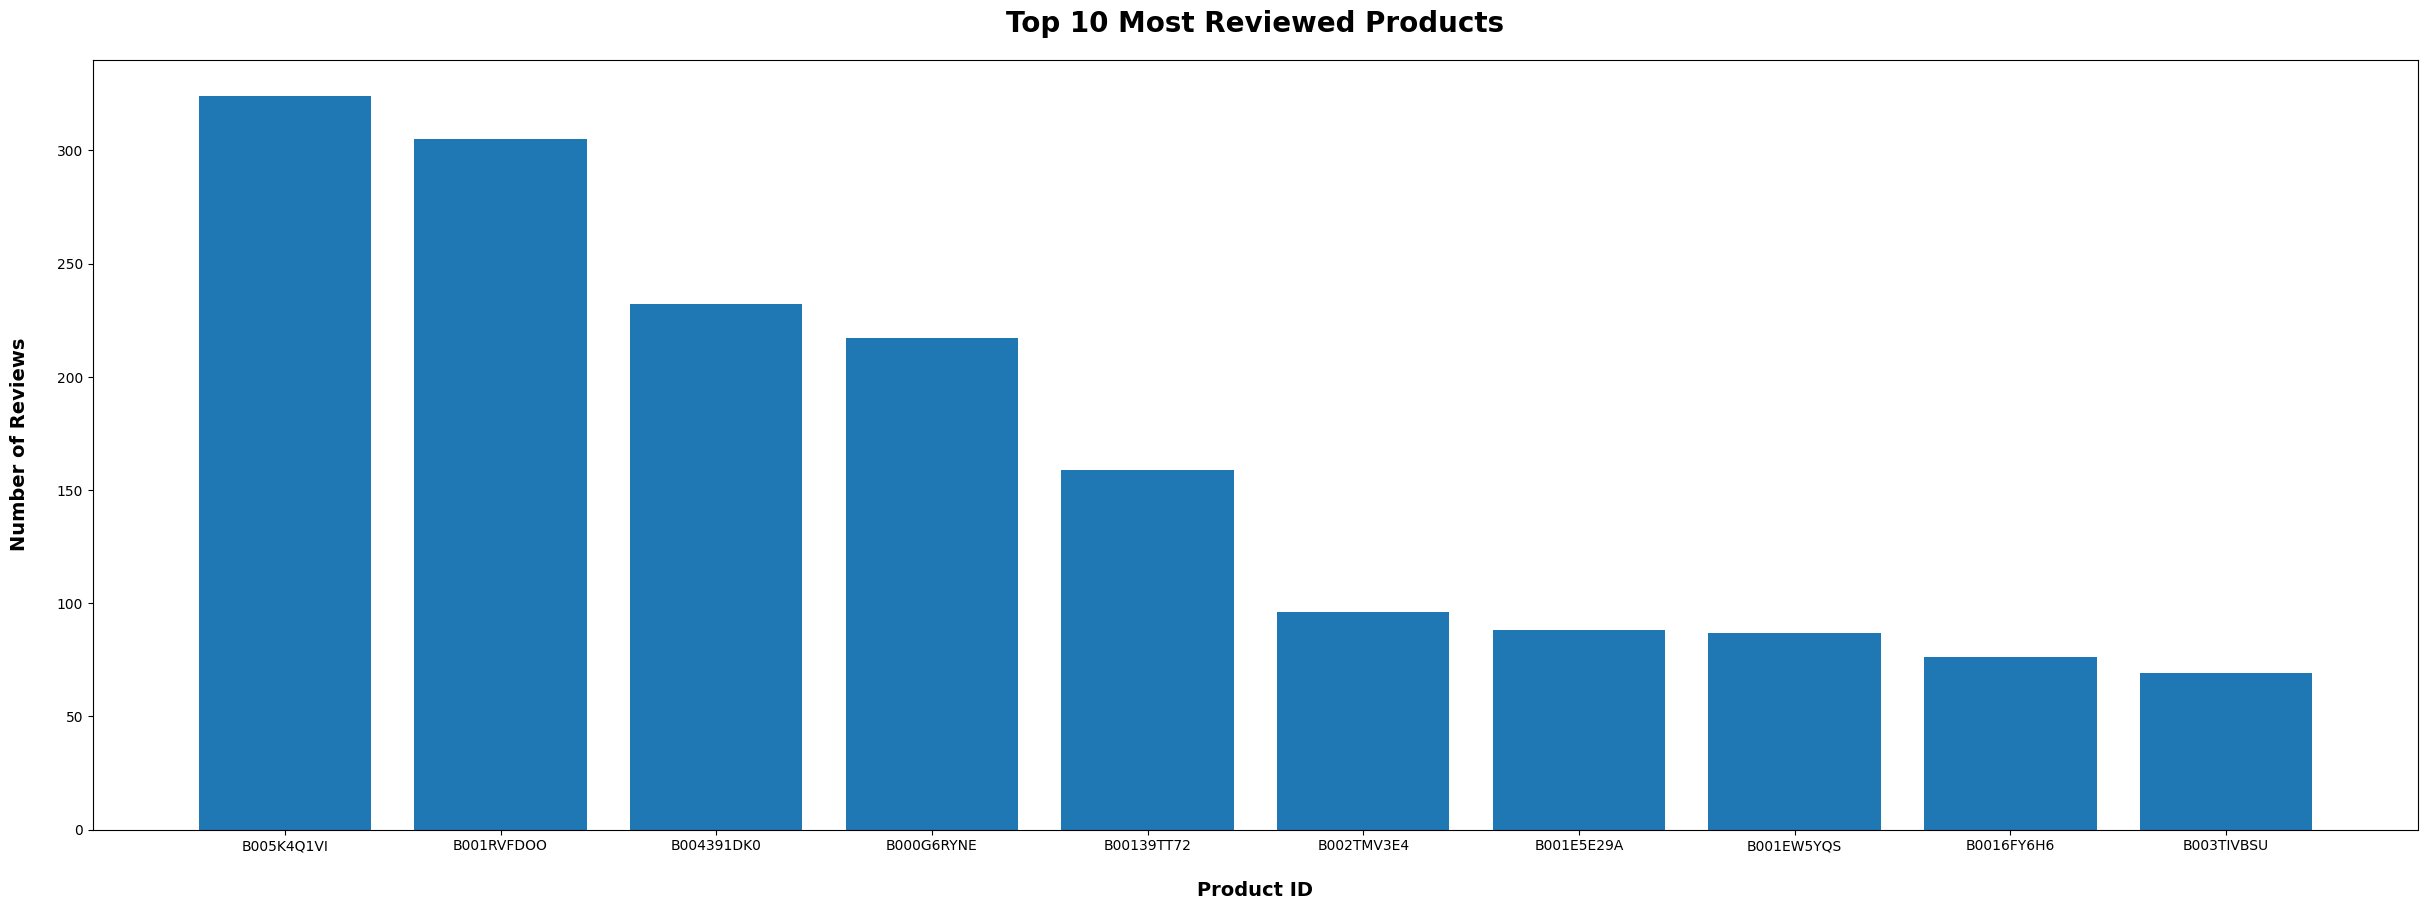

In [223]:
fig, ax = plt.subplots(figsize = (30,10))

ax.bar(x = most_reviewed_df['ProductId'], height = most_reviewed_df['Count'])
ax.set_xlabel('Product ID', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_ylabel('Number of Reviews', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_title('Top 10 Most Reviewed Products', fontsize = 20, pad = 20, fontweight = 'heavy')

In [224]:
fig.savefig('most_reviewed_products.png')

In [225]:
customers_df = df.groupby('UserId').agg({'Score': 'mean', 'roberta_pos':'mean', 'roberta_neg':'mean'})
customers_df

,Score,roberta_pos,roberta_neg
UserId,,,
A10012K7DF3SBQ,3.0,0.914498,0.006991
A1001TYW5FZYD9,5.0,0.918837,0.007993
A102XKYZE9Q9L4,5.0,0.641925,0.077149
A10317LUD1C1VJ,4.0,0.731604,0.042827
A103EZCS9H8WW1,5.0,0.988115,0.001808
...,...,...,...
AZVQMPXZEHQGZ,5.0,0.980451,0.003817
AZVR7NPPEDMMN,3.0,0.652411,0.069341
AZX7EZIIFMFI7,5.0,0.985797,0.001735


In [226]:
customers_df['Count'] = df.groupby('UserId')['Score'].count()
customers_df.sort_values(by='Count', ascending=False).head(10)

,Score,roberta_pos,roberta_neg,Count
UserId,,,,
A3NHUQ33CFH3VM,3.142857,0.699429,0.130418,7
A3OXHLG6DIBRW8,4.333333,0.816347,0.162282,6
AY12DBB0U420B,4.400000,0.904346,0.017608,5
A2R6RA8FRBS608,5.000000,0.939800,0.005918,5
A3PJZ8TU8FDQ1K,5.000000,0.882922,0.006129,5
A31N6KB160O508,4.400000,0.789167,0.042980,5
ATIHDHZYNQ0EI,5.000000,0.958809,0.003505,4
AR7TAEEUDHMUB,4.000000,0.666759,0.254184,4
A3RMGIKUWGPZOK,4.500000,0.422508,0.290578,4


In [234]:
customers_df['Weighted Score'] = (customers_df['Score']*0.6+customers_df['Count']*0.2+customers_df['roberta_pos']*0.1+customers_df['roberta_neg']*0.1)

In [235]:
customers_df.sort_values(by='Weighted Score', ascending=False).head(10)

,Score,roberta_pos,roberta_neg,Count,Weighted Score
UserId,,,,,
A2R6RA8FRBS608,5.000000,0.939800,0.005918,5,4.094572
A3PJZ8TU8FDQ1K,5.000000,0.882922,0.006129,5,4.088905
A3OXHLG6DIBRW8,4.333333,0.816347,0.162282,6,3.897863
A2YHXAZLCLDT8D,5.000000,0.974950,0.001981,4,3.897693
ATIHDHZYNQ0EI,5.000000,0.958809,0.003505,4,3.896231
A281NPSIMI1C2R,5.000000,0.921749,0.005282,4,3.892703
AY12DBB0U420B,4.400000,0.904346,0.017608,5,3.732195
A31N6KB160O508,4.400000,0.789167,0.042980,5,3.723215
AZV26LP92E6WU,5.000000,0.980491,0.003643,3,3.698413


In [236]:
pos_cust = customers_df.sort_values(by='Weighted Score', ascending=False).head(10)

In [237]:
pos_cust = pos_cust.reset_index()
pos_cust

,UserId,Score,roberta_pos,roberta_neg,Count,Weighted Score
0,A2R6RA8FRBS608,5.000000,0.939800,0.005918,5,4.094572
1,A3PJZ8TU8FDQ1K,5.000000,0.882922,0.006129,5,4.088905
2,A3OXHLG6DIBRW8,4.333333,0.816347,0.162282,6,3.897863
3,A2YHXAZLCLDT8D,5.000000,0.974950,0.001981,4,3.897693
4,ATIHDHZYNQ0EI,5.000000,0.958809,0.003505,4,3.896231
5,A281NPSIMI1C2R,5.000000,0.921749,0.005282,4,3.892703
6,AY12DBB0U420B,4.400000,0.904346,0.017608,5,3.732195
7,A31N6KB160O508,4.400000,0.789167,0.042980,5,3.723215
8,AZV26LP92E6WU,5.000000,0.980491,0.003643,3,3.698413
9,A1Z54EM24Y40LL,5.000000,0.971824,0.005266,3,3.697709


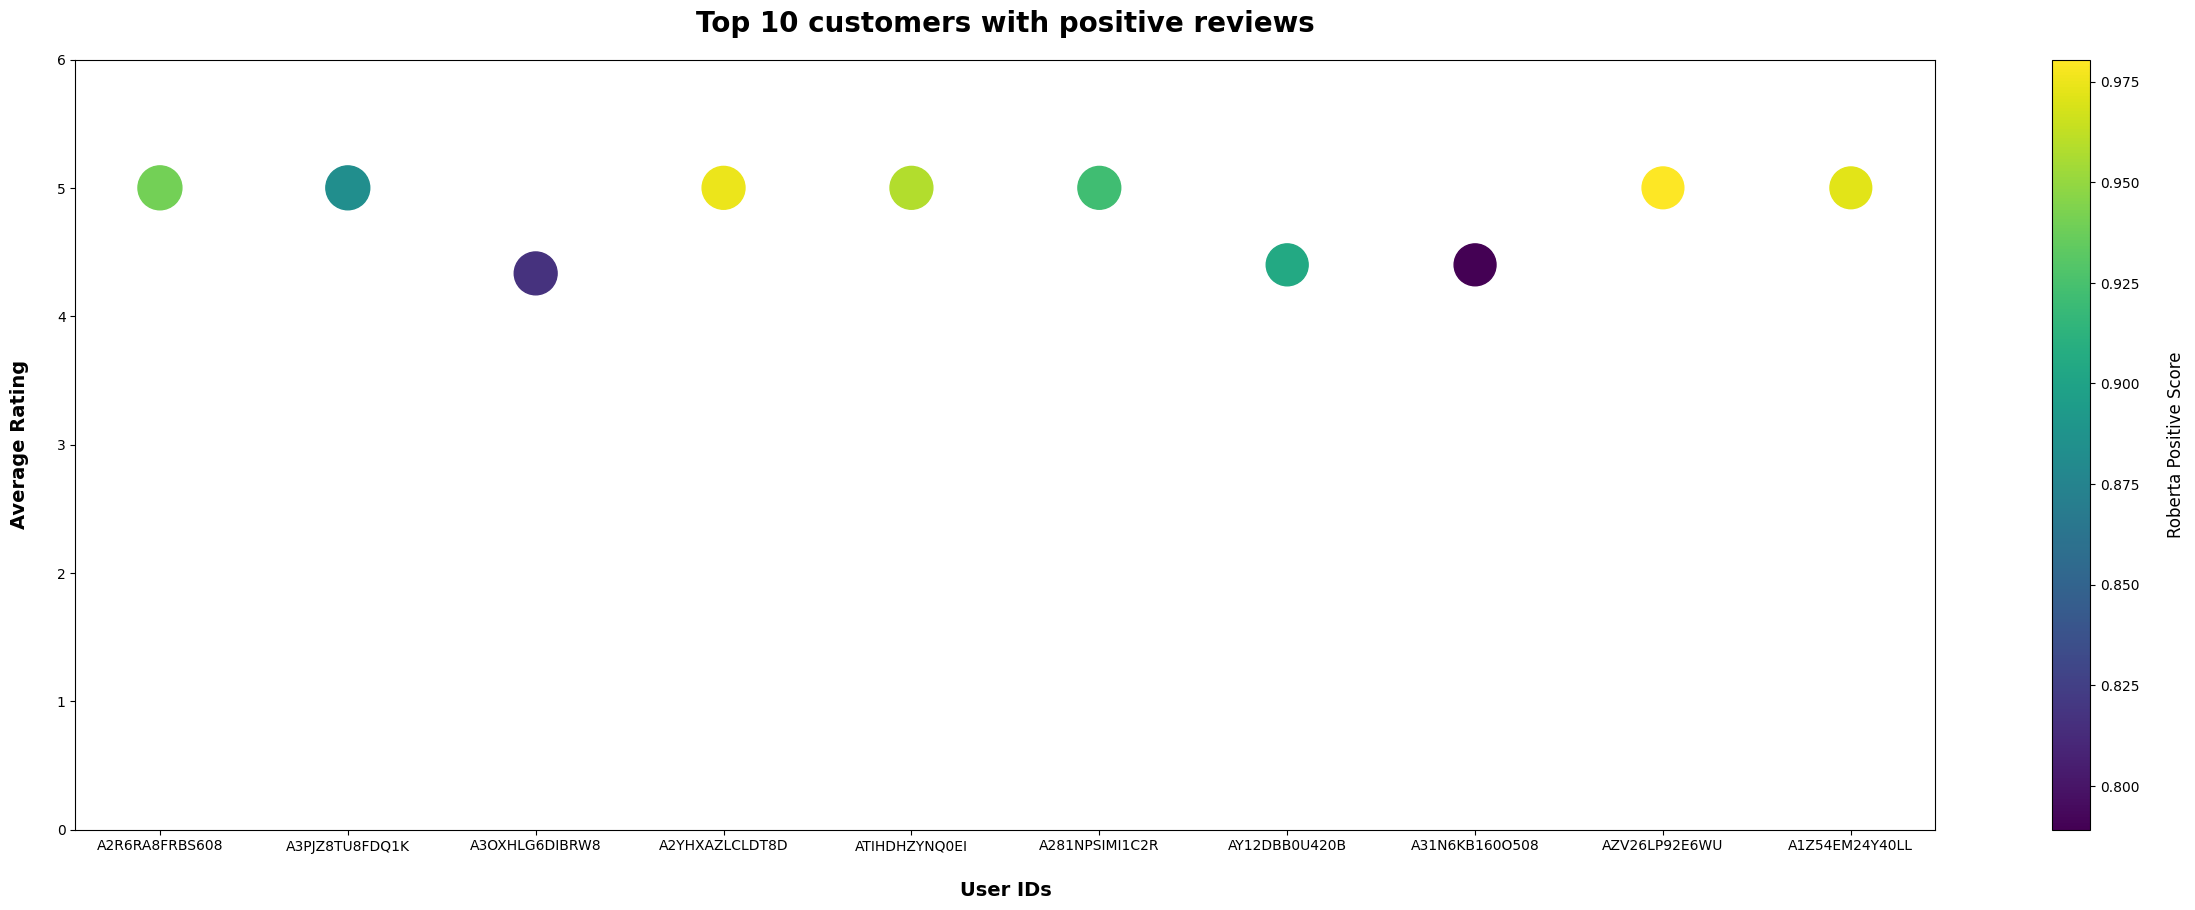

In [239]:
fig, ax = plt.subplots(figsize = (30,10))

size = pos_cust['Weighted Score']/pos_cust['Weighted Score'].max()*1000
scatter = ax.scatter(x = pos_cust['UserId'], y = pos_cust['Score'], c = pos_cust['roberta_pos'], s = size)

ax.set_xlabel('User IDs', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_ylabel('Average Rating', fontsize = 14, labelpad = 20, fontweight = 'heavy')
ax.set_title('Top 10 customers with positive reviews', fontsize = 20, pad = 20, fontweight = 'heavy')

ax.set_ylim(0,6)

cbar = plt.colorbar(scatter)
cbar.set_label('Roberta Positive Score', labelpad = 20, fontsize = 12)

In [240]:
plt.savefig('top_customers_positive_reviews.png')

<Figure size 640x480 with 0 Axes>